In [12]:
import pandas as pd
import numpy as np
import os
import fnmatch
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA, KernelPCA
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import MDS, Isomap, TSNE

#########################
#设置默认参数
FIGURESIZE=(10,8)
FONTSIZE=24

plt. rcParams['figure.figsize'] = FIGURESIZE
plt.rcParams['font.size']=FONTSIZE

plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18


In [13]:
#创建瑞士卷数据集

# 创建时间范围为 0 到 10，步长为 0.01 的数组
t1=np.arange(0,10,.01)

# 生成瑞士卷数据集的三个坐标维度
x0=np.cos(t1)*(t1+1)
x1=np.sin(t1)*(t1+1)
x2=[20*random.random() for x in x0]

# 将三个维度的数据合并成一个瑞士卷数据集
x0=np.array([x0])
x1=np.array([x1])
x2=np.array([x2])
swiss=np.concatenate([x0,x1,x2],axis=0).T
swiss.shape # 打印瑞士卷数据集的形状信息

(1000, 3)

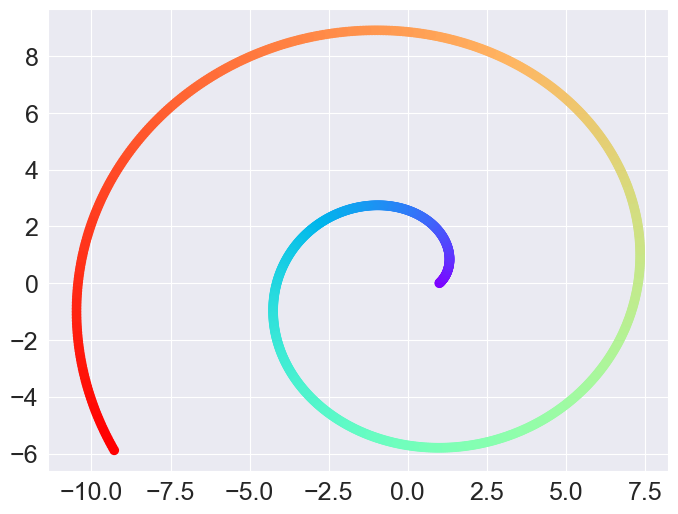

In [14]:
# 绘制瑞士卷数据集的二维散点图
FIGURESIZE = (8, 6)  # 定义图形大小
fig = plt.figure(figsize=FIGURESIZE)  # 创建一个图形实例
ax = fig.add_subplot(111)  # 添加一个子图
ax.scatter(swiss[:, 0], swiss[:, 1], c=t1, cmap=plt.cm.rainbow)  # 绘制散点图

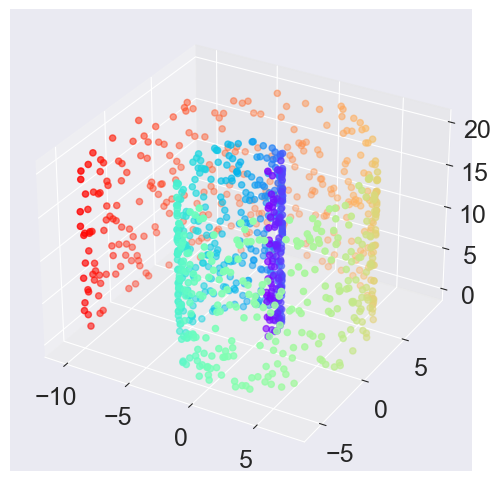

In [15]:
#绘制瑞士卷数据集三维图像
fig = plt.figure(figsize=FIGURESIZE)
ax = fig.add_subplot(111,projection='3d')
ax.scatter(swiss[:, 0], swiss[:, 1],swiss[:,2], c=t1, cmap=plt.cm.rainbow)

In [16]:
#创建弓箭数据集
t2= np.arange(-1,1,.001)
x0=t2
x1=[0.02*random.uniform(-1,1) if (v<.5 and v>-.5)
    else 2*(1+v)*random.uniform(-1,1) if v<=-.5
    else 2*(-.5+v)*random.uniform(-1,1) for v in t2]
x2=np.cos(t2*5+1.5)
x0=np.array([x0])
x1=np.array([x1])
x2=np.array([x2])
arrow=np.concatenate([x0,x1,x2], axis=0).T
arrow.shape

(2000, 3)

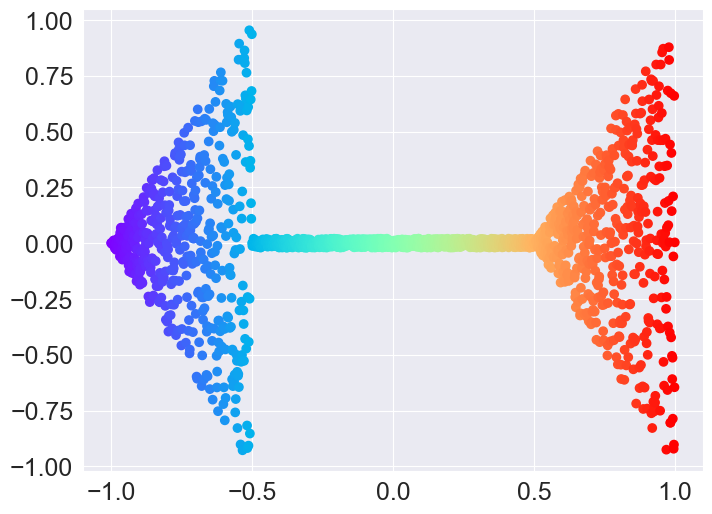

In [17]:
#绘制弓箭数据集二维图像
fig=plt.figure(figsize=FIGURESIZE)
ax=fig.add_subplot(111)
ax.scatter(arrow[:,0],arrow[:,1],c=t2,cmap=plt.cm.rainbow)

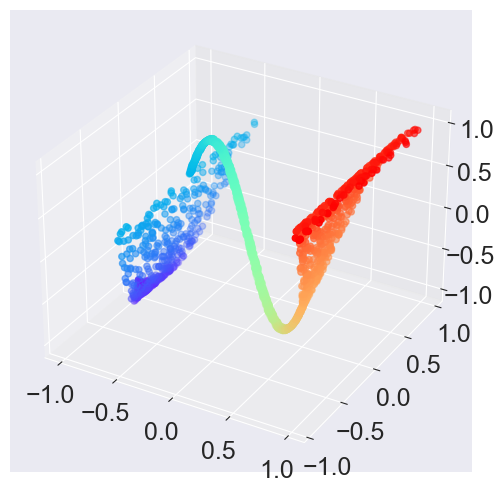

In [18]:
#绘制弓箭数据集三维图像
fig = plt.figure(figsize=FIGURESIZE)
ax = fig.add_subplot(111,projection='3d')
ax.scatter(arrow[:, 0], arrow[:, 1],arrow[:,2], c=t2, cmap=plt.cm.rainbow)

In [19]:
#创建 PCA 模型
pca=PCA(n_components=2)

# 使用 PCA 模型拟合瑞士卷数据集
y=pca.fit_transform(swiss)

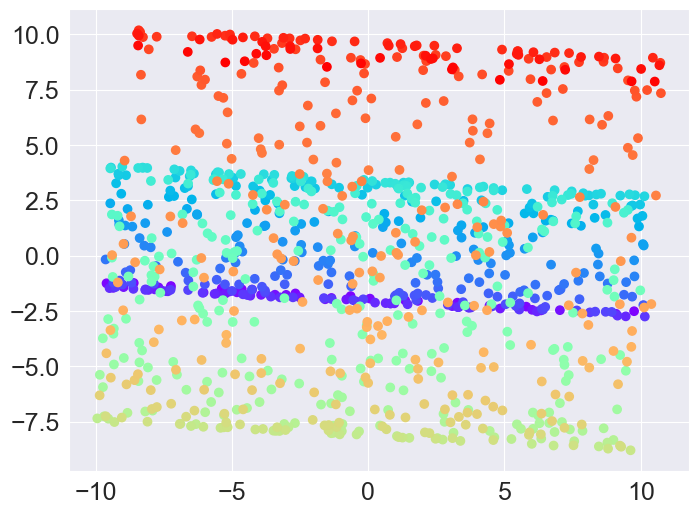

In [20]:
fig=plt.figure(figsize=FIGURESIZE)
ax=fig.add_subplot(111)
ax.scatter(y[:,0],y[:,1],c=t1,cmap=plt.cm.rainbow)


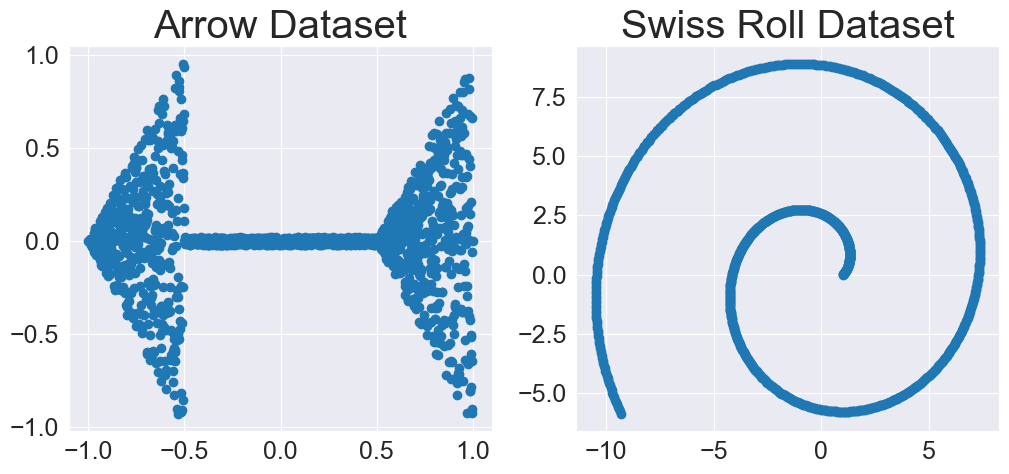

In [21]:
import matplotlib.pyplot as plt

# 绘制弓箭数据集散点图
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(arrow[:, 0], arrow[:, 1])  # 绘制弓箭数据集散点图
axs[0].set_title('Arrow Dataset')  # 设置图表标题

axs[1].scatter(swiss[:, 0], swiss[:, 1])  # 绘制瑞士卷数据集散点图
axs[1].set_title('Swiss Roll Dataset')  # 设置图表标题

plt.show()


In [22]:
#创建 PCA 模型
pca=PCA(n_components=2)

# 使用 PCA 模型拟合弓箭数据集
y=pca.fit_transform(arrow)

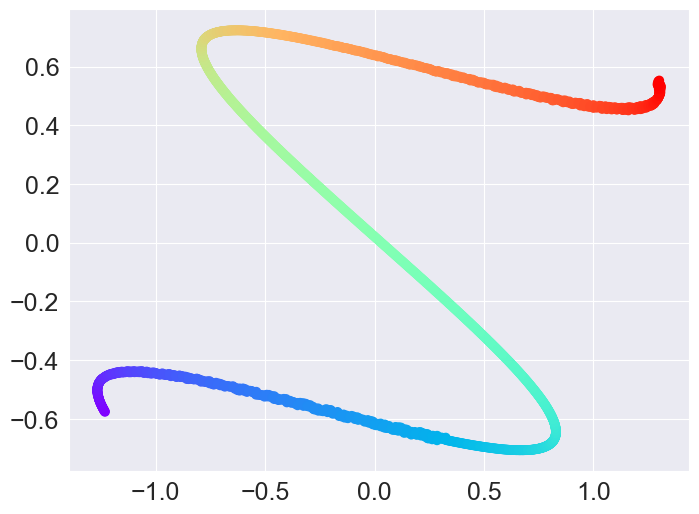

In [23]:
fig=plt.figure(figsize=FIGURESIZE)
ax=fig.add_subplot(111)
ax.scatter(y[:,0],y[:,1],c=t2,cmap=plt.cm.rainbow)

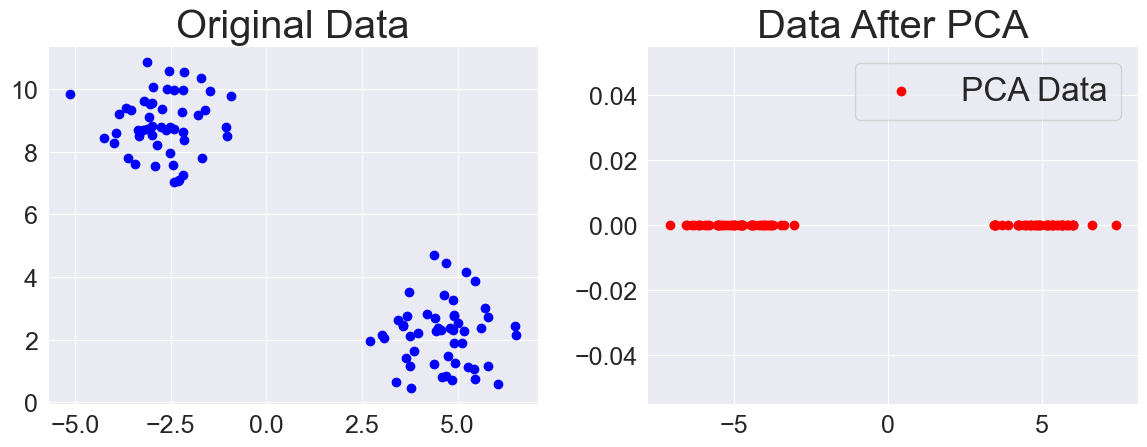

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# 生成二维数据集
X, _ = make_blobs(n_samples=100, n_features=2, centers=2, random_state=42)

# 应用PCA将数据降至一维
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# 可视化原始数据和降维后的数据
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Original Data')
plt.title('Original Data')

plt.subplot(122)
plt.scatter(X_pca, [0] * len(X_pca), c='red', label='PCA Data')
plt.title('Data After PCA')

plt.legend()
plt.tight_layout()
plt.show()


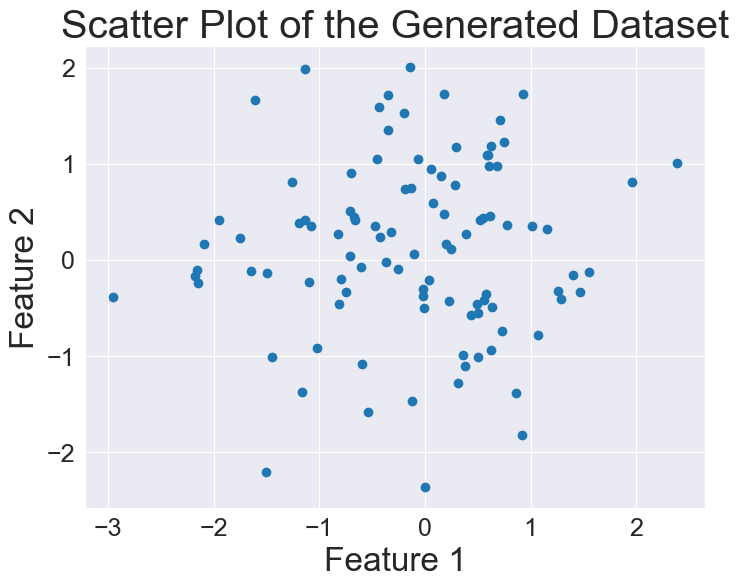

C:\Users\Wendo\anaconda3\envs\test\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


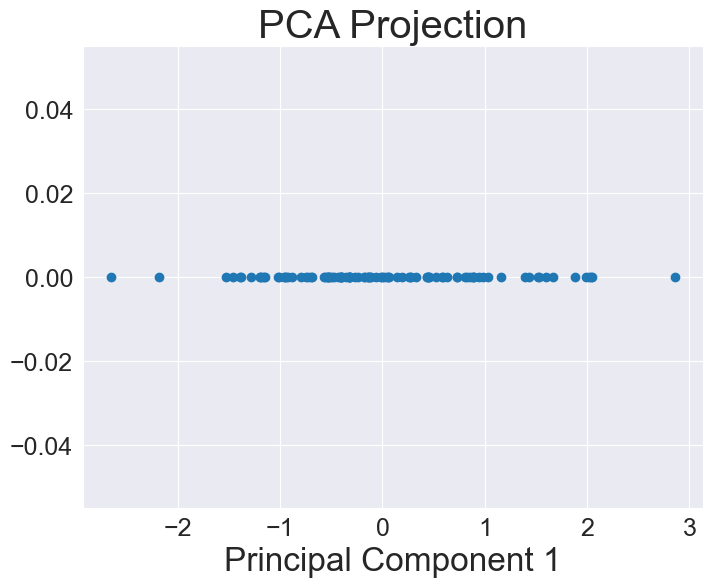

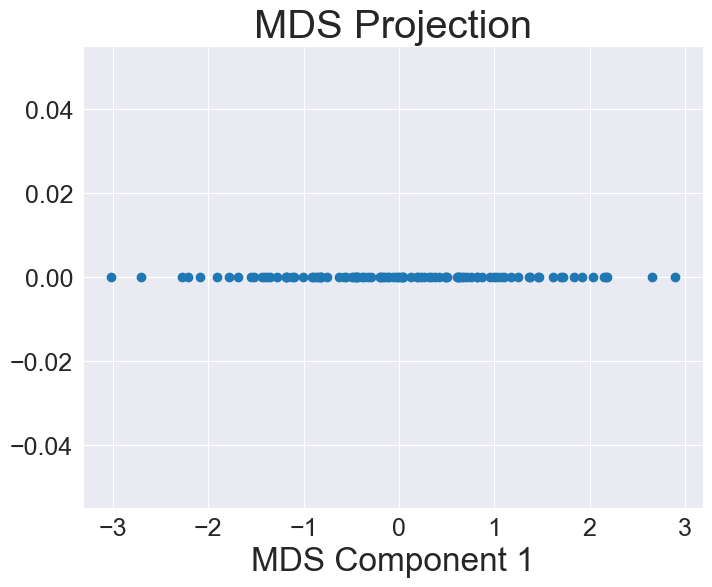

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
# 生成近似直线分布的分散数据集
X, _ = make_regression(n_samples=100, n_features=2, noise=10)

# 创建散点图显示生成的数据分布
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Scatter Plot of the Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 使用PCA进行降维
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# 使用MDS进行降维
mds = MDS(n_components=1)
X_mds = mds.fit_transform(X)

# 显示PCA降维结果
plt.figure(figsize=(8, 6))
plt.scatter(X_pca, np.zeros_like(X_pca))
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.show()

# 显示MDS降维结果
plt.figure(figsize=(8, 6))
plt.scatter(X_mds, np.zeros_like(X_mds))
plt.title('MDS Projection')
plt.xlabel('MDS Component 1')
plt.show()

